In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 

In [33]:
hmeq=pd.read_csv(r"C:\Users\chemm\Desktop\cours\MOSEF\Python\Exercice\Scoring\Projet_scoring\data\hmeq.csv")
hmeq.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [34]:
# hmeq=hmeq.copy()
# numeric_columns = ['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']
# for col in numeric_columns:
#     upper_limit = hmeq[col].quantile(0.99)
#     hmeq[col] = np.where(hmeq[col] > upper_limit, upper_limit, hmeq[col])
# print("Statistiques descriptives après limitation des valeurs extrêmes :")
# print(hmeq[numeric_columns].describe())

In [35]:
missing_data_total = hmeq.isnull().sum().rename_axis('Variables').reset_index(name='Missing Values Total')
missing_data_total['Percentage Missing Total'] = (missing_data_total['Missing Values Total'] / len(hmeq)) * 100

# Calculer les valeurs manquantes pour BAD = 1
hmeq_bad_1 = hmeq[hmeq['BAD'] == 1]
missing_data_bad_1 = hmeq_bad_1.isnull().sum().rename_axis('Variables').reset_index(name='Missing Values BAD = 1')
missing_data_bad_1['Percentage Missing BAD = 1'] = (missing_data_bad_1['Missing Values BAD = 1'] / len(hmeq_bad_1)) * 100

# Calculer les valeurs manquantes pour BAD = 0
hmeq_bad_0 = hmeq[hmeq['BAD'] == 0]
missing_data_bad_0 = hmeq_bad_0.isnull().sum().rename_axis('Variables').reset_index(name='Missing Values BAD = 0')
missing_data_bad_0['Percentage Missing BAD = 0'] = (missing_data_bad_0['Missing Values BAD = 0'] / len(hmeq_bad_0)) * 100

missing_data_combined = missing_data_total.merge(missing_data_bad_1, on='Variables').merge(missing_data_bad_0, on='Variables')

missing_data_combined = missing_data_combined.sort_values(by='Percentage Missing Total', ascending=False)
missing_data_combined


,Variables,Missing Values Total,Percentage Missing Total,Missing Values BAD = 1,Percentage Missing BAD = 1,Missing Values BAD = 0,Percentage Missing BAD = 0
12,DEBTINC,1267,21.258389,786,66.105971,481,10.081744
7,DEROG,708,11.879195,87,7.317073,621,13.016139
8,DELINQ,580,9.731544,72,6.055509,508,10.647663
2,MORTDUE,518,8.691275,106,8.915055,412,8.635506
6,YOJ,515,8.640940,65,5.466779,450,9.431985
10,NINQ,510,8.557047,75,6.307822,435,9.117585
9,CLAGE,308,5.167785,78,6.560135,230,4.820792
5,JOB,279,4.681208,23,1.934399,256,5.365751
4,REASON,252,4.228188,48,4.037006,204,4.275833
11,CLNO,222,3.724832,53,4.457527,169,3.542234


In [64]:
numeric_cols=hmeq.select_dtypes(include=['float64','int64']).columns
categorical_cols=hmeq.select_dtypes(include=['object']).columns

hmeq_median=hmeq.copy()
hmeq_median[numeric_cols]=hmeq_median[numeric_cols].fillna(hmeq_median[numeric_cols].median())

hmeq_median[categorical_cols]=hmeq_median[categorical_cols].fillna(hmeq_median[categorical_cols].mode().iloc[0])

hmeq_median=pd.get_dummies(hmeq_median,columns=['REASON','JOB'],drop_first=True)

X_median=hmeq_median.drop('BAD',axis=1)
y_median=hmeq_median['BAD']

from sklearn.model_selection import train_test_split
X_train_median,X_test_median,y_train_median,y_test_median=train_test_split(X_median,y_median,test_size=0.3,random_state=42)

In [63]:
from imblearn.over_sampling import SMOTE

hmeq_smote=hmeq.copy()
hmeq_smote[numeric_cols]=hmeq_smote[numeric_cols].fillna(hmeq_smote[numeric_cols].median())

hmeq_smote[categorical_cols]=hmeq_smote[categorical_cols].fillna(hmeq_smote[categorical_cols].mode().iloc[0])

hmeq_smote=pd.get_dummies(hmeq_smote,columns=['REASON','JOB'],drop_first=True)

X_smote=hmeq_smote.drop('BAD',axis=1)
y_smote=hmeq_smote['BAD']

X_train_smote,X_test_smote,y_train_smote,y_test_smote=train_test_split(X_smote,y_smote,test_size=0.3,random_state=42)

sm=SMOTE(random_state=42)
X_train_smote,y_train_smote=sm.fit_resample(X_train_smote,y_train_smote)

In [62]:
hmeq_groupby=hmeq.copy()

hmeq_groupby[numeric_cols]=hmeq_groupby.groupby('BAD')[numeric_cols].transform(lambda x:x.fillna(x.median()))

hmeq_groupby[categorical_cols]=hmeq_groupby.groupby('BAD')[categorical_cols].transform(lambda x:x.fillna(x.mode()[0]))

hmeq_groupby=pd.get_dummies(hmeq_groupby,columns=['REASON','JOB'],drop_first=True)

X_groupby=hmeq_groupby.drop('BAD',axis=1)
y_groupby=hmeq_groupby['BAD']

X_train_groupby,X_test_groupby,y_train_groupby,y_test_groupby=train_test_split(X_groupby,y_groupby,test_size=0.3,random_state=42)

sm=SMOTE(random_state=42)
X_train_groupby,y_train_groupby=sm.fit_resample(X_train_groupby,y_train_groupby)

ROC AUC Score (Médiane) : 0.9668510729667943
Rapport de Classification (Médiane) :
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      1389
           1       0.89      0.64      0.74       399

    accuracy                           0.90      1788
   macro avg       0.90      0.81      0.84      1788
weighted avg       0.90      0.90      0.89      1788

Matrice de confusion (Médiane) :
[[1357   32]
 [ 145  254]]


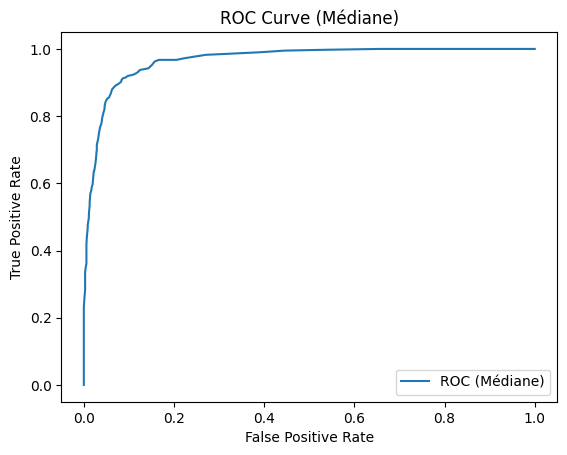

In [61]:
from sklearn.metrics import roc_auc_score, classification_report, roc_curve, precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt

rf_median=RandomForestClassifier(n_estimators=100,random_state=42)
rf_median.fit(X_train_median,y_train_median)

y_pred_median=rf_median.predict(X_test_median)
y_pred_proba_median=rf_median.predict_proba(X_test_median)[:,1]

roc_auc_median=roc_auc_score(y_test_median,y_pred_proba_median)
print(f"ROC AUC Score (Médiane) : {roc_auc_median}")

print("Rapport de Classification (Médiane) :")
print(classification_report(y_test_median,y_pred_median))

cm_median=confusion_matrix(y_test_median,y_pred_median)
print(f"Matrice de confusion (Médiane) :\n{cm_median}")

fpr_median,tpr_median,_=roc_curve(y_test_median,y_pred_proba_median)
plt.plot(fpr_median,tpr_median,label="ROC (Médiane)")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Médiane)')
plt.legend()
plt.show()


ROC AUC Score (Médiane + SMOTE) : 0.9631945233854976
Rapport de Classification (Médiane + SMOTE) :
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      1389
           1       0.85      0.76      0.81       399

    accuracy                           0.92      1788
   macro avg       0.89      0.86      0.88      1788
weighted avg       0.92      0.92      0.92      1788

Matrice de confusion (Médiane + SMOTE) :
[[1337   52]
 [  95  304]]


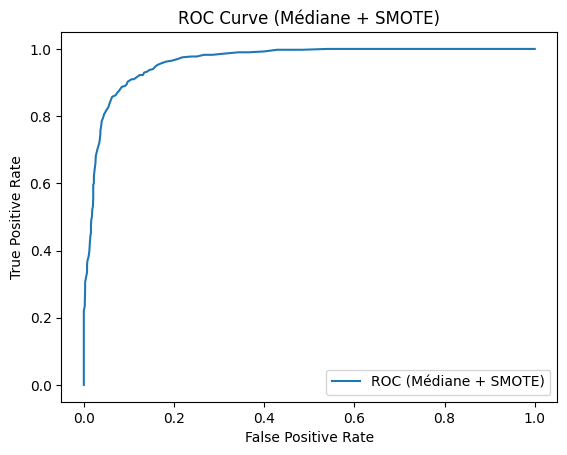

In [60]:
rf_smote=RandomForestClassifier(n_estimators=100,random_state=42)
rf_smote.fit(X_train_smote,y_train_smote)

y_pred_smote=rf_smote.predict(X_test_smote)
y_pred_proba_smote=rf_smote.predict_proba(X_test_smote)[:,1]

roc_auc_smote=roc_auc_score(y_test_smote,y_pred_proba_smote)
print(f"ROC AUC Score (Médiane + SMOTE) : {roc_auc_smote}")

print("Rapport de Classification (Médiane + SMOTE) :")
print(classification_report(y_test_smote,y_pred_smote))

cm_smote=confusion_matrix(y_test_smote,y_pred_smote)
print(f"Matrice de confusion (Médiane + SMOTE) :\n{cm_smote}")

fpr_smote,tpr_smote,_=roc_curve(y_test_smote,y_pred_proba_smote)
plt.plot(fpr_smote,tpr_smote,label="ROC (Médiane + SMOTE)")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Médiane + SMOTE)')
plt.legend()
plt.show()

ROC AUC Score (Groupby + SMOTE) : 0.986014351934552
Rapport de Classification (Groupby + SMOTE) :
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1389
           1       0.95      0.88      0.92       399

    accuracy                           0.96      1788
   macro avg       0.96      0.93      0.95      1788
weighted avg       0.96      0.96      0.96      1788

Matrice de confusion (Groupby + SMOTE) :
[[1372   17]
 [  47  352]]


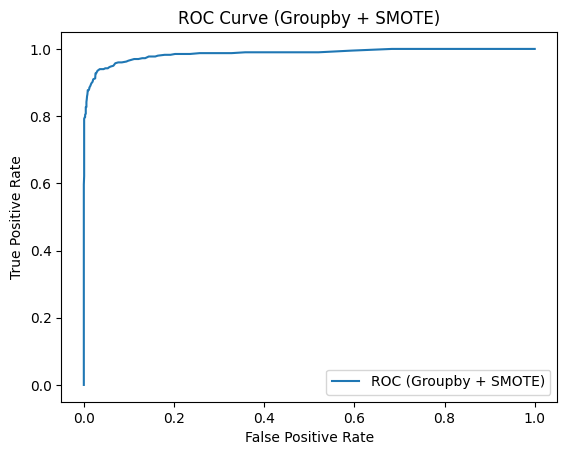

In [48]:
rf_groupby_smote=RandomForestClassifier(n_estimators=100,random_state=42)
rf_groupby_smote.fit(X_train_groupby,y_train_groupby)

y_pred_groupby=rf_groupby_smote.predict(X_test_groupby)
y_pred_proba_groupby=rf_groupby_smote.predict_proba(X_test_groupby)[:,1]

roc_auc_groupby=roc_auc_score(y_test_groupby,y_pred_proba_groupby)
print(f"ROC AUC Score (Groupby + SMOTE) : {roc_auc_groupby}")

print("Rapport de Classification (Groupby + SMOTE) :")
print(classification_report(y_test_groupby,y_pred_groupby))

cm_groupby=confusion_matrix(y_test_groupby,y_pred_groupby)
print(f"Matrice de confusion (Groupby + SMOTE) :\n{cm_groupby}")

fpr_groupby,tpr_groupby,_=roc_curve(y_test_groupby,y_pred_proba_groupby)
plt.plot(fpr_groupby,tpr_groupby,label="ROC (Groupby + SMOTE)")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Groupby + SMOTE)')
plt.legend()
plt.show()


In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, classification_report, f1_score, precision_score, confusion_matrix

results=[]

rf_median=RandomForestClassifier(n_estimators=100,random_state=42)
rf_median.fit(X_train_median,y_train_median)
y_pred_median=rf_median.predict(X_test_median)
y_pred_proba_median=rf_median.predict_proba(X_test_median)[:,1]
roc_auc_median=roc_auc_score(y_test_median,y_pred_proba_median)
f1_median=f1_score(y_test_median,y_pred_median)
precision_median=precision_score(y_test_median,y_pred_median)

results.append({'Modèle':'Médiane','ROC AUC':roc_auc_median,'F1-Score':f1_median,'Précision':precision_median})

rf_smote=RandomForestClassifier(n_estimators=100,random_state=42)
rf_smote.fit(X_train_smote,y_train_smote)
y_pred_smote=rf_smote.predict(X_test_smote)
y_pred_proba_smote=rf_smote.predict_proba(X_test_smote)[:,1]
roc_auc_smote=roc_auc_score(y_test_smote,y_pred_proba_smote)
f1_smote=f1_score(y_test_smote,y_pred_smote)
precision_smote=precision_score(y_test_smote,y_pred_smote)

results.append({'Modèle':'Médiane + SMOTE','ROC AUC':roc_auc_smote,'F1-Score':f1_smote,'Précision':precision_smote})

rf_groupby_smote=RandomForestClassifier(n_estimators=100,random_state=42)
rf_groupby_smote.fit(X_train_groupby,y_train_groupby)
y_pred_groupby=rf_groupby_smote.predict(X_test_groupby)
y_pred_proba_groupby=rf_groupby_smote.predict_proba(X_test_groupby)[:,1]
roc_auc_groupby=roc_auc_score(y_test_groupby,y_pred_proba_groupby)
f1_groupby=f1_score(y_test_groupby,y_pred_groupby)
precision_groupby=precision_score(y_test_groupby,y_pred_groupby)

results.append({'Modèle':'Groupby + SMOTE','ROC AUC':roc_auc_groupby,'F1-Score':f1_groupby,'Précision':precision_groupby})

import pandas as pd

df_results=pd.DataFrame(results)

print(df_results)

best_model_roc_auc=df_results.loc[df_results['ROC AUC'].idxmax()]
best_model_f1_score=df_results.loc[df_results['F1-Score'].idxmax()]

print("\nMeilleur modèle basé sur le ROC AUC :")
print(best_model_roc_auc)

print("\nMeilleur modèle basé sur le F1-Score :")
print(best_model_f1_score)


            Modèle   ROC AUC  F1-Score  Précision
0          Médiane  0.966851  0.741606   0.888112
1  Médiane + SMOTE  0.963195  0.805298   0.853933
2  Groupby + SMOTE  0.986014  0.916667   0.953930

Meilleur modèle basé sur le ROC AUC :
Modèle       Groupby + SMOTE
ROC AUC             0.986014
F1-Score            0.916667
Précision            0.95393
Name: 2, dtype: object

Meilleur modèle basé sur le F1-Score :
Modèle       Groupby + SMOTE
ROC AUC             0.986014
F1-Score            0.916667
Précision            0.95393
Name: 2, dtype: object


## AVEC GRIDSEARCH

In [56]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score, f1_score, precision_score

param_grid={'n_estimators':[100,200,300],'max_depth':[10,20,30,None],'min_samples_split':[2,5,10],'min_samples_leaf':[1,2,4],'bootstrap':[True,False]}

rf=RandomForestClassifier(random_state=42)

grid_search_groupby=GridSearchCV(estimator=rf,param_grid=param_grid,cv=3,n_jobs=-1,verbose=2,scoring='roc_auc')

sm=SMOTE(random_state=42)
X_train_groupby_res,y_train_groupby_res=sm.fit_resample(X_train_groupby,y_train_groupby)

grid_search_groupby.fit(X_train_groupby_res,y_train_groupby_res)

print(f"Meilleurs hyperparamètres pour le modèle Groupby + SMOTE: {grid_search_groupby.best_params_}")

best_rf_groupby=grid_search_groupby.best_estimator_

y_pred_groupby_optimized=best_rf_groupby.predict(X_test_groupby)
y_pred_proba_groupby_optimized=best_rf_groupby.predict_proba(X_test_groupby)[:,1]

roc_auc_groupby_optimized=roc_auc_score(y_test_groupby,y_pred_proba_groupby_optimized)
f1_groupby_optimized=f1_score(y_test_groupby,y_pred_groupby_optimized)
precision_groupby_optimized=precision_score(y_test_groupby,y_pred_groupby_optimized)

print(f"ROC AUC Score (Groupby + SMOTE optimisé) : {roc_auc_groupby_optimized}")
print(f"F1 Score (Groupby + SMOTE optimisé) : {f1_groupby_optimized}")
print(f"Précision (Groupby + SMOTE optimisé) : {precision_groupby_optimized}")


Fitting 3 folds for each of 216 candidates, totalling 648 fits
Meilleurs hyperparamètres pour le modèle Groupby + SMOTE: {'bootstrap': False, 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
ROC AUC Score (Groupby + SMOTE optimisé) : 0.9905712806133403
F1 Score (Groupby + SMOTE optimisé) : 0.9268929503916449
Précision (Groupby + SMOTE optimisé) : 0.9673024523160763


## RF AVEC BEST PARAM

ROC AUC Score (Groupby + SMOTE optimisé) : 0.9905712806133403
F1 Score (Groupby + SMOTE optimisé) : 0.9268929503916449
Précision (Groupby + SMOTE optimisé) : 0.9673024523160763

Rapport de Classification (Groupby + SMOTE) :
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1389
           1       0.97      0.89      0.93       399

    accuracy                           0.97      1788
   macro avg       0.97      0.94      0.95      1788
weighted avg       0.97      0.97      0.97      1788


Matrice de confusion (Groupby + SMOTE) :
[[1377   12]
 [  44  355]]


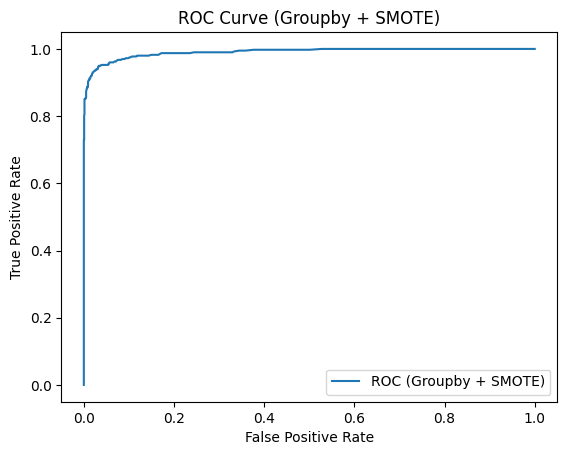

In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, f1_score, precision_score, classification_report, confusion_matrix, roc_curve
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

best_params={'bootstrap':False,'max_depth':30,'min_samples_leaf':1,'min_samples_split':2,'n_estimators':300}

rf_groupby_optimized=RandomForestClassifier(bootstrap=best_params['bootstrap'],max_depth=best_params['max_depth'],min_samples_leaf=best_params['min_samples_leaf'],min_samples_split=best_params['min_samples_split'],n_estimators=best_params['n_estimators'],random_state=42)

sm=SMOTE(random_state=42)
X_train_groupby_res,y_train_groupby_res=sm.fit_resample(X_train_groupby,y_train_groupby)

rf_groupby_optimized.fit(X_train_groupby_res,y_train_groupby_res)

y_pred_groupby_optimized=rf_groupby_optimized.predict(X_test_groupby)
y_pred_proba_groupby_optimized=rf_groupby_optimized.predict_proba(X_test_groupby)[:,1]

roc_auc_groupby_optimized=roc_auc_score(y_test_groupby,y_pred_proba_groupby_optimized)
f1_groupby_optimized=f1_score(y_test_groupby,y_pred_groupby_optimized)
precision_groupby_optimized=precision_score(y_test_groupby,y_pred_groupby_optimized)

print(f"ROC AUC Score (Groupby + SMOTE optimisé) : {roc_auc_groupby_optimized}")
print(f"F1 Score (Groupby + SMOTE optimisé) : {f1_groupby_optimized}")
print(f"Précision (Groupby + SMOTE optimisé) : {precision_groupby_optimized}")

print("\nRapport de Classification (Groupby + SMOTE) :")
print(classification_report(y_test_groupby,y_pred_groupby_optimized))

cm_groupby_optimized=confusion_matrix(y_test_groupby,y_pred_groupby_optimized)
print(f"\nMatrice de confusion (Groupby + SMOTE) :\n{cm_groupby_optimized}")

fpr_groupby,tpr_groupby,_=roc_curve(y_test_groupby,y_pred_proba_groupby_optimized)

plt.plot(fpr_groupby,tpr_groupby,label="ROC (Groupby + SMOTE)")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Groupby + SMOTE)')
plt.legend()
plt.show()
